In [5]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
!pip install fbprophet
import pandas as pd
from fbprophet import Prophet

In [6]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [7]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


* use only `Date` and `Adj Close` columns

In [10]:
wmtNext = wmt[['Date','Adj Close']]

* rename columns to fit Prophet naming convention

In [14]:
wmtNext = wmtNext.rename(columns={"Date": "ds", "Adj Close": "y"})
wmtNext.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


In [15]:
wmtNext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11815 entries, 0 to 11814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      11815 non-null  object 
 1   y       11815 non-null  float64
dtypes: float64(1), object(1)
memory usage: 184.7+ KB


* convert date to datetime

In [16]:
wmtNext['ds'] = pd.to_datetime(wmtNext['ds'])

In [17]:
wmtNext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11815 entries, 0 to 11814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      11815 non-null  datetime64[ns]
 1   y       11815 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 184.7 KB


* plot time-series

* instantiate Prophet

In [18]:
m = Prophet() # create an instance


* fit model

In [19]:
m.fit(wmtNext) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values in future 

In [20]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
12175,2020-06-27
12176,2020-06-28
12177,2020-06-29
12178,2020-06-30
12179,2020-07-01


* plot forecast

In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12175,2020-06-27,96.535009,91.792813,101.426155
12176,2020-06-28,96.537762,91.861527,101.329049
12177,2020-06-29,96.513977,92.042548,101.830697
12178,2020-06-30,96.534648,91.510841,101.558590
12179,2020-07-01,96.524340,91.687074,101.663726


* plot components

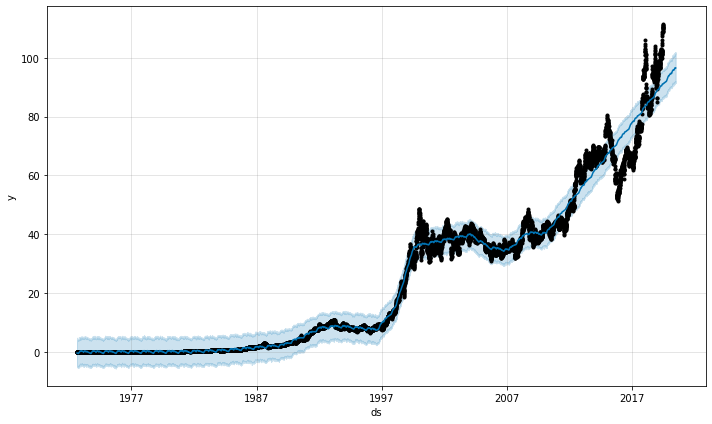

In [22]:
fig1 = m.plot(forecast)

- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.